# CH2: Machine Learning for Regression

## 2.1 Load the data

In [14]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("../data/data.csv")  # read the csv file
df.head()  # show the first 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
len(df)  # number of rows

11914

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

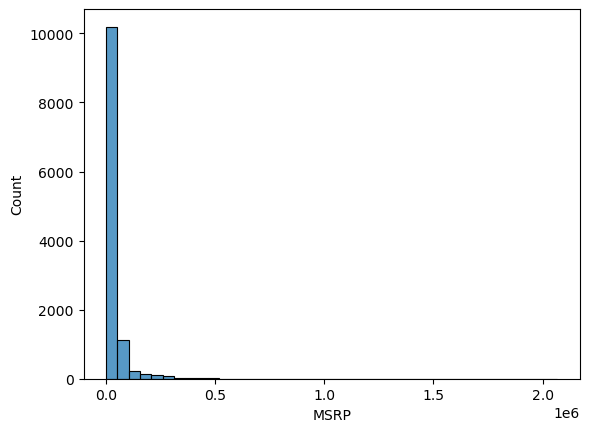

In [17]:
# how the target looks like?
sns.histplot(df.MSRP, bins=40)  # histogram of the target

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

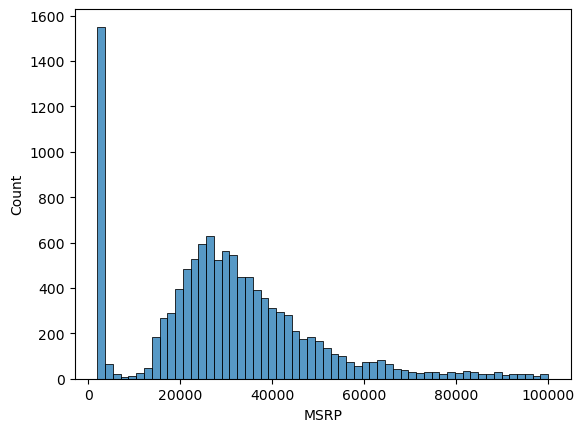

In [18]:
# closer look
sns.histplot(df.MSRP[df.MSRP < 100000])  # histogram of the target

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

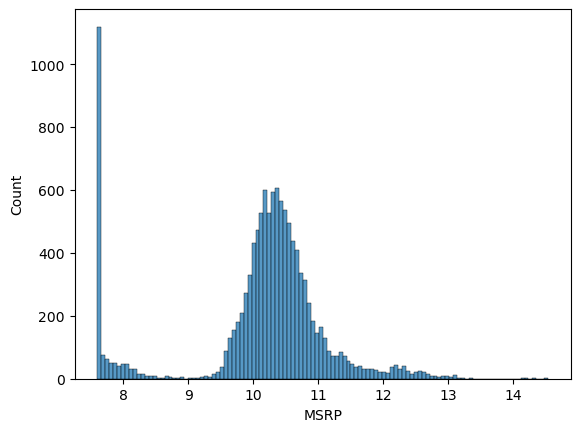

In [19]:
# log transformation
log_price = np.log1p(df.MSRP)  # log transformation of the target
sns.histplot(log_price)  # histogram of the target

## 2.2 Checking for missing values

In [20]:
df.isnull().sum()  # check for missing values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## 2.3 Validation Framework

In [21]:
# change the name of columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)  # list of columns with string type
# apply the function to all the columns with string type
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')  # apply the function to all the columns with string type

In [22]:
# splitting data into validation, test, and training sets
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

np.random.seed(2105)
idx = np.arange(n)
np.random.shuffle(idx)  # shuffle the indices
df_shuffled = df.iloc[idx]  # shuffle the dataframe
df_train = df_shuffled.iloc[:n_train].copy()  # training set
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  # validation set
df_test = df_shuffled.iloc[n_train+n_val:].copy()  # test set

In [23]:
# applyin the log transformation to the target
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
# to avoid using accidentally target values in the model, we drop the target column
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.4 Linear Regression implemented with Numpy

In [24]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])  # ones vector
    X = np.column_stack([ones, X])  # add the ones column to the feature matrix
    XTX = X.T.dot(X)  # matrix multiplication
    XTX_inv = np.linalg.inv(XTX)  # inverse of the matrix
    w = XTX_inv.dot(X.T).dot(y)  # matrix multiplication
    return w[0], w[1:]  # return the first element of the vector, and the rest of the vector

## 2.5 Baseline solution

In [25]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [26]:
# dealing with null  values
df_num = df_num.fillna(0)  # replace null values with 0

In [27]:
# convert dataframe to numpy array
X_train = df_num.values
w_0, w = train_linear_regression(X_train, y_train)

In [28]:
y_pred = w_0 + X_train.dot(w)

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

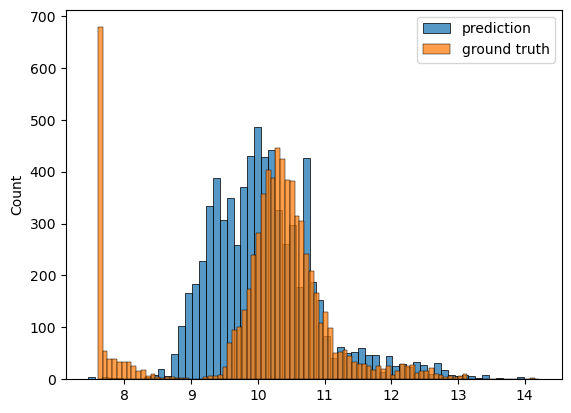

In [29]:
# compare predictions with ground truth
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='ground truth')
plt.legend()

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [31]:
rmse(y_train, y_pred)

0.7527053930433741

In [32]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [33]:
y_pred = w_0 + X_val.dot(w)

In [34]:
rmse(y_val, y_pred)

0.7307712776090516

In [35]:
# prepare_X function to convert dataframe to numpy array
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [36]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  0.7307712776090516


In [37]:
# creating the age feature in the prepare_X function
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
# training a new model with age feature
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  0.5126651264848536


/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

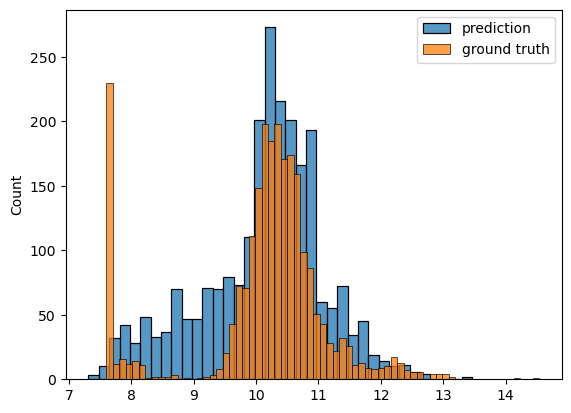

In [39]:
# visualizing predictions vs ground truth
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='ground truth')
plt.legend()

In [41]:
# handling categorical variables
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
# adding another categorical feature

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
# training a new model with age and make features
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  0.5030525817146254


In [44]:
# regularization: RIDGE
def train_linear_regression_reg(X, y, r=0.1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [46]:
# effect for regularization on the model
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    print("%5s, %.2f, %.2f, %.2f" % (r, w_0, w[1], w[2]))

    0, 11.22, 0.10, -0.02
0.001, 11.21, 0.10, -0.02
 0.01, 11.16, 0.10, -0.02
  0.1, 10.68, 0.10, -0.02
    1, 8.67, 0.10, -0.02
   10, 6.68, 0.14, 0.01


In [47]:
# validation with r=0.001
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  0.5030471173111246


In [48]:
# testing with r=0.01
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test: ', rmse(y_test, y_pred))

validation:  0.5029999890575979
test:  0.5266876052352149


## 2.6 Using the model

In [49]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 250,
    'highway_mpg': 31,
    'make': 'bmw',
    'market_category': 'luxury',
    'model': 'x5',
    'number_of_doors': 4.0,
    'popularity': 204,
    'transmission_type': 'automatic',
    'vehicle_size': 'large',
    'vehicle_style': 'sedan',
    'year': 2016,
}

In [50]:
df = pd.DataFrame([ad])
X_test = prepare_X(df)
y_pred = w_0 + X_test.dot(w)

In [51]:
suggestion = np.expm1(y_pred)
print(suggestion)

[42704.29084402]
